**<font color=black size=5 face=雅黑>精品小班项目课程1：某国际电商分析项目</font>**

**<font color=black size=4 face=雅黑>Step 1: 明确项目背景和需求</font>**

项目背景：某国际电商（APP和网站）。

项目需求：
1. 为产品团队和运营团队或者开发团队提出建议，以提高下单转换率。
2. 建立一个预测用户下单转化模型。

**<font color=black size=4 face=雅黑>Step 2: 探索数据集</font>**

**<font color=black size=3 face=雅黑>2.1 载入各种数据科学库以及可视化库</font>**

In [23]:
#导入数据处理的库
import pandas as pd
import numpy as np

#导入画图的可视化库
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#plt中文显示问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.sans-serif'] = ['SimHei']

import warnings
warnings.filterwarnings("ignore")

**<font color=black size=3 face=雅黑>2.2 载入数据</font>**

In [24]:
#用户信息数据表user_table
user_info=pd.read_csv("user_table.csv")
user_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited
0,654951,0,17,Female,US,mobile,android,Direct,3
1,730619,0,27,Male,UK,mobile,iOS,Direct,5
2,261033,0,24,Female,US,mobile,android,Seo,4
3,533685,0,21,Male,UK,desktop,windows,Direct,5
4,699480,0,17,Male,UK,mobile,iOS,Direct,6


* user_id:用户ID（唯一）
* new_user:是否是新用户。是：1，不是：0
* age:用户年龄
* country:用户所属国家
* device:用户设备。mobile:手机（进入的是电商App),desktop:电脑（进入的是电商网站web)
* operative_system:操作系统。mac,windows,linux(电脑操作系统); android和ios(手机操作系统）
* source:用户来源。（Direct直接,Seo搜索引擎,Ads广告)
* total_page_visited:浏览页面总数。

In [25]:
user_info.shape

(90400, 9)

In [137]:
#home_page_table
#浏览过home_page的用户 
user_home=pd.read_csv("home_page_table.csv")
user_home.head()
user_home.shape

(90400, 2)

In [138]:
user_listing=pd.read_csv("listing_page_table.csv")
user_listing.head()
user_listing.shape

(66392, 2)

In [28]:
user_listing.shape

(66392, 2)

**<font color=black size=3 face=雅黑>2.3 数据预览</font>**

In [29]:
#通过describe( )来熟悉数据的相关统计量，主要了解数据的大概范围以及每个特征的异常值的初步判断
user_info.describe()

,user_id,new_user,age,total_pages_visited
count,90400.000000,90400.000000,90400.000000,90400.000000
mean,498709.683473,0.308374,30.440796,5.418097
std,289040.674085,0.461824,8.224111,3.682882
min,17.000000,0.000000,17.000000,1.000000
25%,247978.750000,0.000000,24.000000,3.000000
50%,498267.000000,0.000000,30.000000,4.000000
75%,749789.250000,1.000000,36.000000,7.000000
max,999979.000000,1.000000,123.000000,28.000000


In [30]:
#通过info( )来熟悉数据类型，有助于了解是否存缺失值（NaN)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 9 columns):
user_id                90400 non-null int64
new_user               90400 non-null int64
age                    90400 non-null int64
sex                    89627 non-null object
country                90339 non-null object
device                 90267 non-null object
operative_system       90183 non-null object
source                 90277 non-null object
total_pages_visited    90400 non-null int64
dtypes: int64(4), object(5)
memory usage: 6.2+ MB


In [31]:
user_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


**<font color=black size=3 face=雅黑>2.4 可视化探索部分</font>**

**<font color=black size=3 face=雅黑>针对user_table 用户信息表：</font>**

**<font color=black size=3 face=雅黑>2.4.1 new_user是否为新用户</font>**

In [32]:
user_info['new_user'].nunique()

2

In [33]:
pd.DataFrame(user_info['new_user'].value_counts())

,new_user
0,62523
1,27877


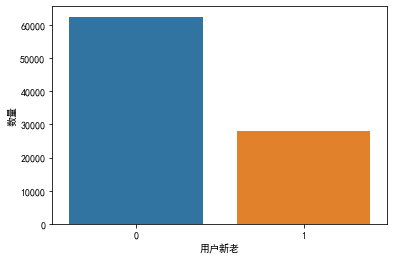

In [34]:
new_user=pd.DataFrame(user_info['new_user'].value_counts())

sns.barplot(x=new_user.index,y=new_user.new_user)
plt.xlabel('用户新老')
plt.ylabel('数量')
plt.show()

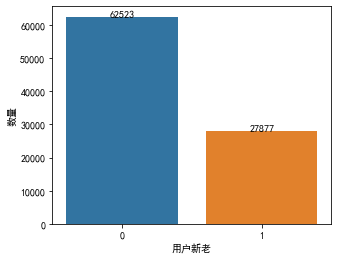

In [35]:
plt.figure(figsize=(5, 4))

new_user=pd.DataFrame(user_info['new_user'].value_counts().reset_index(name='counts'))

g =sns.barplot(x='index',y='counts',data=new_user)

for index, row in new_user.iterrows():
    g.text(row.name,row.counts,row.counts,color='black', ha="center")
    
plt.xlabel('用户新老')
plt.ylabel('数量')
plt.show()

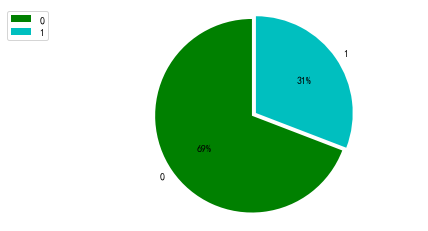

In [36]:
new_user=pd.DataFrame(user_info['new_user'].value_counts())

labels = new_user.index
sizes = new_user.values
colors = ['green','c','gray','beige','darkkhaki','fuchsia']

explode = (0.05,0)
sizes = sizes[:,0]
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance=1.1,autopct='%2.0f%%',shadow=False,startangle=90,pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
    
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

**<font color=black size=3 face=雅黑>2.4.2 age</font>**

In [37]:
user_info['age'].unique()

array([ 17,  27,  24,  21,  29,  28,  25,  22,  32,  31,  30,  23,  19,
        18,  35,  33,  20,  46,  42,  41,  39,  38,  34,  26,  45,  37,
        36,  51,  48,  44,  43,  40,  47,  52,  50,  49,  58,  54,  53,
        61,  55,  62,  60,  57,  56,  59,  66,  64, 123,  63, 109,  67,
        65], dtype=int64)

In [38]:
print(sorted(user_info['age'].unique(),reverse=True))

[123, 109, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


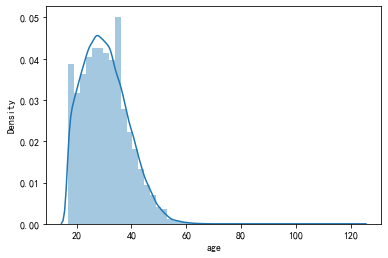

In [39]:
#age:因为age变量个数比较多，是连续型数值变量，所有可以用直方图展示
sns.distplot(user_info['age'])
plt.show()

**<font color=black size=3 face=雅黑>2.4.3 sex性别 </font>**

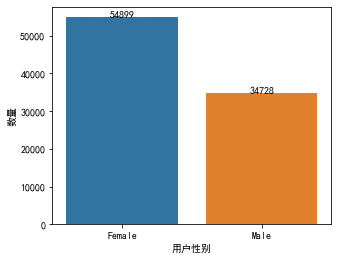

In [40]:
plt.figure(figsize=(5, 4))

sex=pd.DataFrame(user_info['sex'].value_counts().reset_index(name='counts'))

g =sns.barplot(x='index',y='counts',data=sex)

for index, row in sex.iterrows():
    g.text(row.name,row.counts,row.counts,color='black', ha="center")
    
plt.xlabel('用户性别')
plt.ylabel('数量')
plt.show()

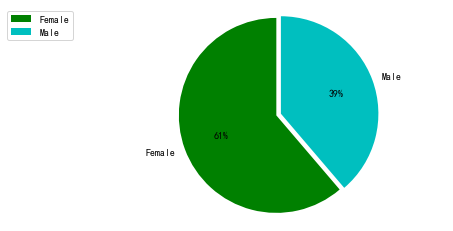

In [41]:
sex=pd.DataFrame(user_info['sex'].value_counts())

labels = sex.index
sizes = sex.values
colors = ['green','c','gray','beige','darkkhaki','fuchsia']

explode = (0.05,0)
sizes = sizes[:,0]
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance=1.1,autopct='%2.0f%%',shadow=False,startangle=90,pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
    
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

**<font color=black size=3 face=雅黑>2.4.4 country </font>**

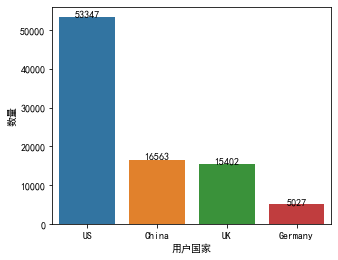

In [42]:
plt.figure(figsize=(5, 4))

country=pd.DataFrame(user_info['country'].value_counts().reset_index(name='counts'))

g =sns.barplot(x='index',y='counts',data=country)

for index, row in country.iterrows():
    g.text(row.name,row.counts,row.counts,color='black', ha="center")
    
plt.xlabel('用户国家')
plt.ylabel('数量')
plt.show()

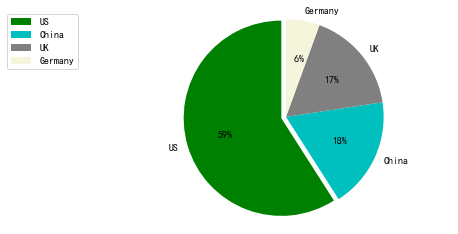

In [45]:
country=pd.DataFrame(user_info['country'].value_counts())

labels = country.index
sizes = country.values
colors = ['green','c','gray','beige','darkkhaki','fuchsia']

explode = (0.05, 0, 0, 0)
sizes = sizes[:,0]
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance=1.1,autopct='%2.0f%%',shadow=False,startangle=90,pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
    
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

**<font color=black size=3 face=雅黑>2.4.5 device </font>**

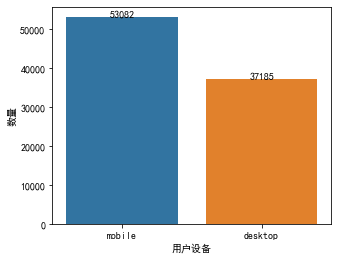

In [46]:
plt.figure(figsize=(5, 4))

device=pd.DataFrame(user_info['device'].value_counts().reset_index(name='counts'))

g =sns.barplot(x='index',y='counts',data=device)

for index, row in device.iterrows():
    g.text(row.name,row.counts,row.counts,color='black', ha="center")
    
plt.xlabel('用户设备')
plt.ylabel('数量')
plt.show()

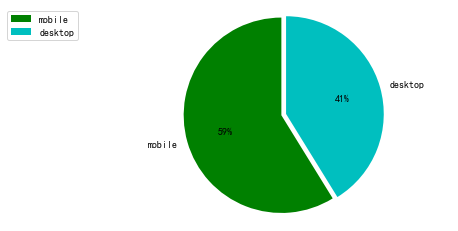

In [48]:
device=pd.DataFrame(user_info['device'].value_counts())

labels = device.index
sizes = device.values
colors = ['green','c','gray','beige','darkkhaki','fuchsia']

explode = (0.05,0)

sizes = sizes[:,0]
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance=1.1,autopct='%2.0f%%',shadow=False,startangle=90,pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
    
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

**<font color=black size=3 face=雅黑>2.4.6 operative_system </font>**

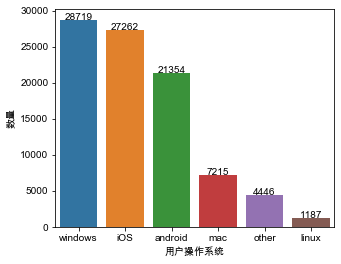

In [59]:
plt.figure(figsize=(5, 4))

operative_system=pd.DataFrame(user_info['operative_system'].value_counts().reset_index(name='counts'))

g =sns.barplot(x='index',y='counts',data=operative_system)

for index, row in operative_system.iterrows():
    g.text(row.name,row.counts,row.counts,color='black', ha="center")
    
plt.xlabel('用户操作系统')
plt.ylabel('数量')
plt.show()

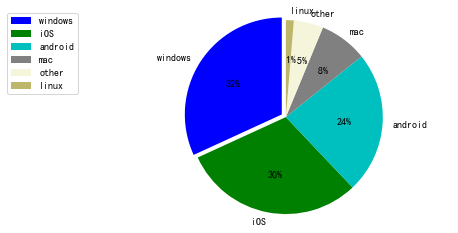

In [49]:
operative_system=pd.DataFrame(user_info['operative_system'].value_counts())

labels = operative_system.index
sizes = operative_system.values
colors = ['blue', 'green','c','gray','beige','darkkhaki','fuchsia']

explode = (0.05,0,0,0,0,0)
sizes = sizes[:,0]
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance=1.1,autopct='%2.0f%%',shadow=False,startangle=90,pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
    
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

**<font color=black size=3 face=雅黑>2.4.7 source </font>**

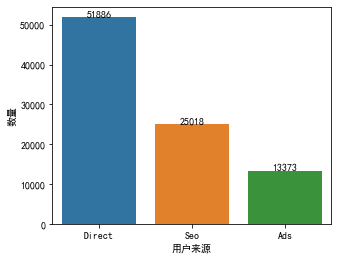

In [50]:
plt.figure(figsize=(5, 4))

source=pd.DataFrame(user_info['source'].value_counts().reset_index(name='counts'))

g =sns.barplot(x='index',y='counts',data=source)

for index, row in source.iterrows():
    g.text(row.name,row.counts,row.counts,color='black', ha="center")
    
plt.xlabel('用户来源')
plt.ylabel('数量')
plt.show()

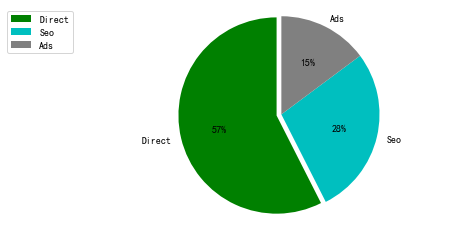

In [55]:
source=pd.DataFrame(user_info['source'].value_counts())

labels = source.index
sizes = source.values
colors = ['green','c','gray','beige','darkkhaki','fuchsia']

explode = (0.05,0,0)
sizes = sizes[:,0]
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance=1.1,autopct='%2.0f%%',shadow=False,startangle=90,pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
    
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

**<font color=black size=3 face=雅黑>2.4.8 total_pages_visited</font>**

In [52]:
user_info['total_pages_visited'].unique()

array([ 3,  5,  4,  6,  2,  8,  7,  9, 14, 10, 11,  1, 18, 15, 19, 12, 13,
       21, 17, 20, 23, 16, 25, 26, 24, 22, 27, 28], dtype=int64)

In [53]:
print(sorted(user_info['total_pages_visited'].unique(),reverse=False))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


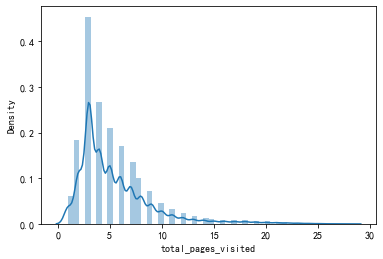

In [54]:
sns.distplot(user_info['total_pages_visited'])
plt.show()

**<font color=black size=4.5 face=雅黑> 3.Data Processing 数据处理阶段</font>**

数据处理阶段：针对异常值，缺失值进行处理

**<font color=black size=4 face=雅黑> 3.1 Outlier 异常值 </font>**

异常值主要针对数值型变量age，total_page_visited, new_user
其中new_user实则为分类型变量，因此异常值仅针对age和total_page_visited去查找

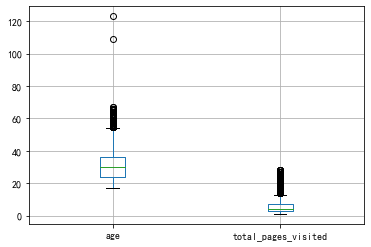

In [56]:
#age和total_pages_visited的箱型图
boxplot = user_info.boxplot(column=['age', 'total_pages_visited'])

异常值的处理要结合实际数据来，在箱线图中显示异常的值不一定真的不合理

In [57]:
#查看age的异常值是否其实合理
user_info['age'].max()

123

In [58]:
print(sorted(user_info['age'].unique(),reverse=True))

[123, 109, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [59]:
#删除两个异常值
user_info = user_info[user_info['age']<100]

**<font color=black size=4 face=雅黑> 3.2 Missing Value 缺失值处理 </font>**

填补缺失值的方法：
* 删除法：如果缺失值比例较低，可以直接删除。
* 根据数据分布：填入众数，平均数，中位数。
* 建模

In [60]:
#查看缺失值个数
user_info.isnull().sum()

user_id                  0
new_user                 0
age                      0
sex                    773
country                 61
device                 133
operative_system       217
source                 123
total_pages_visited      0
dtype: int64

**<font color=black size=4 face=雅黑> 3.2.1 缺失值:country </font>**

* 因为缺失值较少，可以直接删除或直接填入众数

In [61]:
user_info['country'].mode()[0]

'US'

In [62]:
user_info['country'].fillna(user_info['country'].mode()[0], inplace=True)

In [63]:
user_info.isnull().sum()

user_id                  0
new_user                 0
age                      0
sex                    773
country                  0
device                 133
operative_system       217
source                 123
total_pages_visited      0
dtype: int64

**<font color=black size=4 face=雅黑> 3.2.2 缺失值:source </font>**

* 因为缺失值较少，可以直接删除或直接填入众数
* 根据其他已知数据的分布来填补
* source猜想跟new_user有关

In [64]:
#创建一个没有缺失值的新数据集去看规律

#dropna()默认为axis=0:删除含有缺失值的每行数据，axis=1:删除含有缺失值的每列数据
user_full=user_info.dropna()

In [65]:
user_full.groupby(['new_user','source'])['user_id'].count()

new_user  source
0         Ads        4362
          Direct    49046
          Seo        8276
1         Ads        8826
          Direct     2227
          Seo       16419
Name: user_id, dtype: int64

老用户主要来源于direct,新用户主要来源于Seo

In [66]:
#当用户为新用户，source缺失值填补Seo

user_info['source']=np.where((user_info['source'].isnull())&(user_info['new_user']==1),
         'Seo',user_info['source'])

In [67]:
#当用户为老用户，source缺失值填补direct
user_info['source'].fillna('Direct',inplace=True)

In [68]:
user_info.isnull().sum()

user_id                  0
new_user                 0
age                      0
sex                    773
country                  0
device                 133
operative_system       217
source                   0
total_pages_visited      0
dtype: int64

**<font color=black size=4 face=雅黑> 3.2.3 缺失值:device </font>**

In [69]:
#操作系统为mac,windows,linux 设备为desktop

user_info['device']=np.where((user_info['device'].isnull())&(user_info['operative_system'].isin(['mac','windows','linux'])),
         'desktop',user_info['device'])

In [70]:
#操作系统为ios,android 设备为mobile 
user_info['device']=np.where((user_info['device'].isnull())&(user_info['operative_system'].isin(['iOS','android'])),
         'mobile',user_info['device'])

In [71]:
user_info.isnull().sum()

user_id                  0
new_user                 0
age                      0
sex                    773
country                  0
device                  11
operative_system       217
source                   0
total_pages_visited      0
dtype: int64

In [72]:
user_info[user_info['device'].isnull()]

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited
8502,561375,1,36,Female,China,NaN,NaN,Ads,1
12227,252135,0,37,Female,China,NaN,NaN,Direct,6
17597,251157,1,37,Female,US,NaN,other,Ads,2
24241,602831,0,39,Female,China,NaN,NaN,Seo,4
27673,265247,1,29,Female,Germany,NaN,other,Seo,4
33022,190794,0,39,Female,China,NaN,NaN,Seo,6
41410,449090,0,18,Female,China,NaN,other,Direct,6
43294,608421,1,41,Female,US,NaN,other,Ads,8
43711,996089,0,39,Female,US,NaN,other,Direct,3
44003,763064,0,38,Female,China,NaN,other,Direct,6


In [73]:
user_info['device'].value_counts()

mobile     53147
desktop    37240
Name: device, dtype: int64

In [74]:
#用众数填补剩余device缺失值
user_info['device'].fillna(user_info['device'].mode()[0], inplace=True)

In [75]:
user_info.isnull().sum()

user_id                  0
new_user                 0
age                      0
sex                    773
country                  0
device                   0
operative_system       217
source                   0
total_pages_visited      0
dtype: int64

**<font color=black size=4 face=雅黑> 3.2.4 缺失值:operative_system </font>**

In [76]:
user_full.groupby(['device','operative_system'])['user_id'].count()

device   operative_system
desktop  linux                1121
         mac                  7143
         other                  38
         windows             28411
mobile   android             21117
         iOS                 26955
         other                4371
Name: user_id, dtype: int64

mobile主要操作系统是ios, desktop主要操作系统是windows

In [77]:
#操作系统填补为iOS当用户使用的是mobile

user_info['operative_system']=np.where((user_info['operative_system'].isnull())&(user_info['device']=='mobile'),
         'iOS',user_info['operative_system'])

In [78]:
#操作系统填补为windows当用户使用的是desktop

user_info['operative_system'].fillna('windows',inplace=True)

In [79]:
user_info.isnull().sum()

user_id                  0
new_user                 0
age                      0
sex                    773
country                  0
device                   0
operative_system         0
source                   0
total_pages_visited      0
dtype: int64

**<font color=black size=4 face=雅黑> 3.2.5 缺失值:sex </font>**

In [80]:
user_full.groupby(['operative_system','sex'])['user_id'].count()

operative_system  sex   
android           Female    12982
                  Male       8135
iOS               Female    16670
                  Male      10285
linux             Female       84
                  Male       1037
mac               Female     4437
                  Male       2706
other             Female     2728
                  Male       1681
windows           Female    17686
                  Male      10725
Name: user_id, dtype: int64

如果是linux系统，可以考虑填入male；其他系统考虑填入female

In [81]:
#填sex补缺失值

user_info['sex']=np.where((user_info['sex'].isnull())&(user_info['operative_system']=='linux'),
         'Male',user_info['sex'])

In [82]:
user_info['sex'].fillna('Female',inplace=True)

In [83]:
user_info.isnull().sum()

user_id                0
new_user               0
age                    0
sex                    0
country                0
device                 0
operative_system       0
source                 0
total_pages_visited    0
dtype: int64

**<font color=black size=4 face=雅黑>Step3.3: 数据集合并</font>**

In [84]:
user_home=pd.read_csv('home_page_table.csv')
user_listing=pd.read_csv('listing_page_table.csv')
user_product=pd.read_csv('product_page_table.csv')
user_payment=pd.read_csv('payment_page_table.csv')
user_confirmation=pd.read_csv('payment_confirmation_table.csv')

In [85]:
#利用python进行数据分析8.2节：合并数据集 merge

user_info=pd.merge(user_info,user_home,on='user_id',how='left')
user_info.rename(columns={'page': 'home_page'},inplace=True)

In [86]:
user_info=pd.merge(user_info,user_listing,on='user_id',how='left')
user_info.rename(columns={'page': 'listing_page'},inplace=True)

In [87]:
user_info=pd.merge(user_info,user_product,on='user_id',how='left')
user_info.rename(columns={'page': 'product_page'},inplace=True)

In [88]:
user_info=pd.merge(user_info,user_payment,on='user_id',how='left')
user_info.rename(columns={'page': 'payment_page'},inplace=True)

In [89]:
user_info=pd.merge(user_info,user_confirmation,on='user_id',how='left')
user_info.rename(columns={'page': 'confirmation_page'},inplace=True)

In [90]:
user_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page
0,654951,0,17,Female,US,mobile,android,Direct,3,home_page,listing_page,product_page,NaN,NaN
1,730619,0,27,Male,UK,mobile,iOS,Direct,5,home_page,NaN,NaN,NaN,NaN
2,261033,0,24,Female,US,mobile,android,Seo,4,home_page,listing_page,NaN,NaN,NaN
3,533685,0,21,Male,UK,desktop,windows,Direct,5,home_page,listing_page,product_page,payment_page,NaN
4,699480,0,17,Male,UK,mobile,iOS,Direct,6,home_page,listing_page,NaN,NaN,NaN


In [91]:
for col in ['home_page','listing_page','product_page','payment_page','confirmation_page']:
    user_info[col].fillna(0, inplace=True)

In [92]:
user_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page
0,654951,0,17,Female,US,mobile,android,Direct,3,home_page,listing_page,product_page,0,0
1,730619,0,27,Male,UK,mobile,iOS,Direct,5,home_page,0,0,0,0
2,261033,0,24,Female,US,mobile,android,Seo,4,home_page,listing_page,0,0,0
3,533685,0,21,Male,UK,desktop,windows,Direct,5,home_page,listing_page,product_page,payment_page,0
4,699480,0,17,Male,UK,mobile,iOS,Direct,6,home_page,listing_page,0,0,0


In [93]:
#正则表达式
import re 

for col in ['home_page','listing_page','product_page','payment_page','confirmation_page']:
    user_info[col].replace(re.compile('page'),1,inplace=True)
    
user_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page
0,654951,0,17,Female,US,mobile,android,Direct,3,1,1,1,0,0
1,730619,0,27,Male,UK,mobile,iOS,Direct,5,1,0,0,0,0
2,261033,0,24,Female,US,mobile,android,Seo,4,1,1,0,0,0
3,533685,0,21,Male,UK,desktop,windows,Direct,5,1,1,1,1,0
4,699480,0,17,Male,UK,mobile,iOS,Direct,6,1,1,0,0,0


**<font color=black size=4 face=雅黑>探索下单转化率和各个特征间的关系</font>**

In [94]:
user_info['confirmation_page'].value_counts()

0    88404
1     1994
Name: confirmation_page, dtype: int64

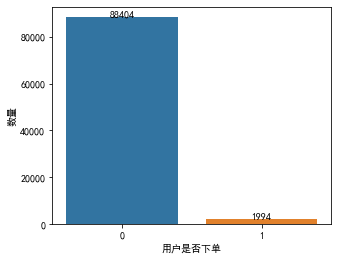

In [95]:
plt.figure(figsize=(5, 4))

convert=pd.DataFrame(user_info['confirmation_page'].value_counts().reset_index(name='counts'))

g =sns.barplot(x='index',y='counts',data=convert)

for index, row in convert.iterrows():
    g.text(row.name,row.counts,row.counts,color='black', ha="center")
    
plt.xlabel('用户是否下单')
plt.ylabel('数量')
plt.show()

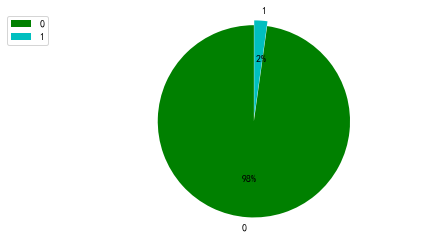

In [98]:
convert= pd.DataFrame(user_info['confirmation_page'].value_counts())

labels = convert.index
sizes = convert.values
colors = ['green','c','gray','beige','darkkhaki','fuchsia']

explode = (0.05,0.0)
sizes = sizes[:,0]
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance=1.1,autopct='%2.0f%%',shadow=False,startangle=90,pctdistance=0.6)
for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
    
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

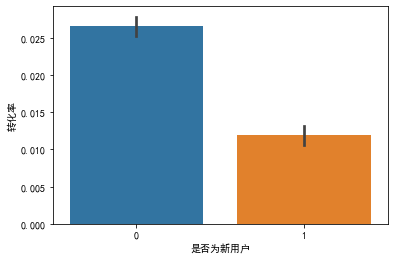

In [99]:
#新用户
sns.barplot(x='new_user',y='confirmation_page',data=user_info)
plt.xlabel('是否为新用户')
plt.ylabel('转化率')
plt.show()

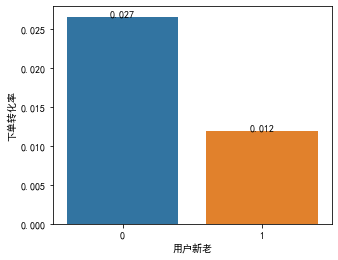

In [100]:
#新用户
plt.figure(figsize=(5, 4))

new_user=user_info.groupby(['new_user'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='new_user',y='CR',data=new_user)

for index, row in new_user.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户新老')
plt.ylabel('下单转化率')
plt.show()

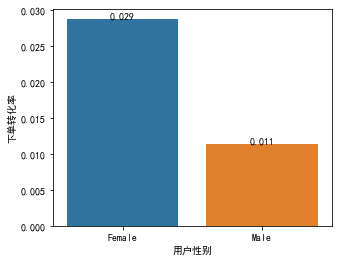

In [101]:
#性别
plt.figure(figsize=(5, 4))

sex=user_info.groupby(['sex'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='sex',y='CR',data=sex)

for index, row in sex.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户性别')
plt.ylabel('下单转化率')
plt.show()

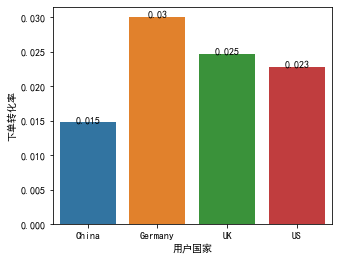

In [102]:
#国家
plt.figure(figsize=(5, 4))

country=user_info.groupby(['country'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='country',y='CR',data=country)

for index, row in country.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户国家')
plt.ylabel('下单转化率')
plt.show()

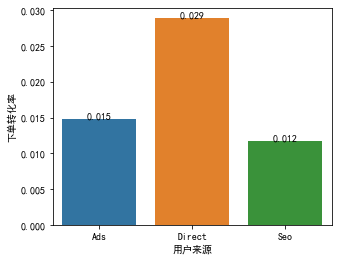

In [103]:
#用户来源
plt.figure(figsize=(5, 4))

source=user_info.groupby(['source'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='source',y='CR',data=source)

for index, row in source.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户来源')
plt.ylabel('下单转化率')
plt.show()

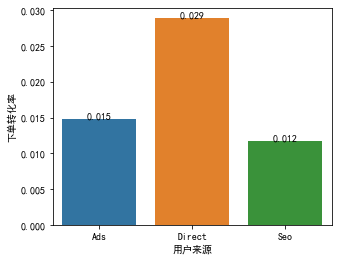

In [104]:
#用户来源
plt.figure(figsize=(5, 4))

source=user_info.groupby(['source'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='source',y='CR',data=source)

for index, row in source.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户来源')
plt.ylabel('下单转化率')
plt.show()

In [105]:
user_info.groupby(['source','new_user'])['confirmation_page'].mean().reset_index(name='CR')

,source,new_user,CR
0,Ads,0,0.016074
1,Ads,1,0.014180
2,Direct,0,0.029814
3,Direct,1,0.008400
4,Seo,0,0.012984
5,Seo,1,0.011165


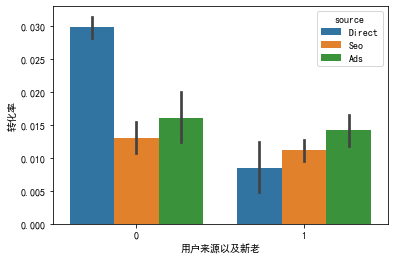

In [106]:
#用户来源以及新老
sns.barplot(x='new_user',y='confirmation_page',hue='source',data=user_info)
plt.xlabel('用户来源以及新老')
plt.ylabel('转化率')
plt.show()

老用户直接进入平台的下单转化率更高，新用户通过广告进入平台的下单转化率更高

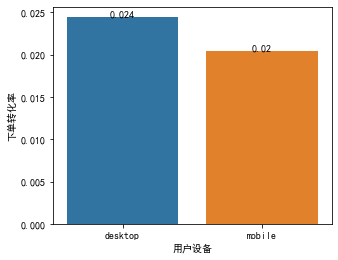

In [107]:
#用户设备
plt.figure(figsize=(5, 4))

device=user_info.groupby(['device'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='device',y='CR',data=device)

for index, row in device.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户设备')
plt.ylabel('下单转化率')
plt.show()

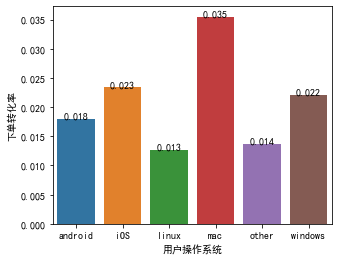

In [108]:
#用户操作系统
plt.figure(figsize=(5, 4))

operative_system=user_info.groupby(['operative_system'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='operative_system',y='CR',data=operative_system)

for index, row in operative_system.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户操作系统')
plt.ylabel('下单转化率')
plt.show()

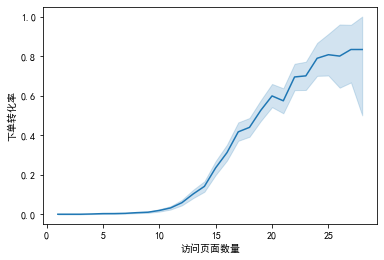

In [109]:
#访问页面数量
sns.lineplot(x='total_pages_visited',y='confirmation_page',data=user_info)
plt.xlabel('访问页面数量')
plt.ylabel('下单转化率')
plt.show()

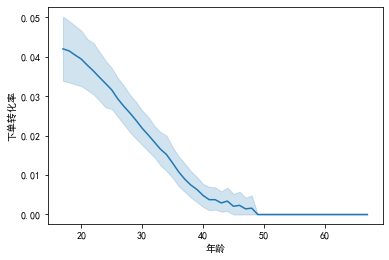

In [110]:
#年龄
sns.lineplot(x='age',y='confirmation_page',data=user_info)
plt.xlabel('年龄')
plt.ylabel('下单转化率')
plt.show()

**<font color=black size=4 face=雅黑>漏斗分析</font>**

如果是转化率下降导致GMV下降，用漏斗分析法，用户从进入平台到最终完成购买这个动作这个环节当中，经历了哪些页面，在不同页面都会存在一定程度的用户流失，如果在某个页面，用户流失率非常高，就需要定位到这个页面去看，是不是这个页面或者功能等让用户产生了不好的体验，从而导致用户大量流失!

In [111]:
convertion=[]
page=['home_page','listing_page','product_page','payment_page','confirmation_page']
for col in range(len(page)-1):
    convertion.append(user_info[page[col+1]].sum()/user_info[page[col]].sum())

In [112]:
convertion

[0.7344299652647183,
 0.6808151707309725,
 0.1334070796460177,
 0.3306799336650083]

In [113]:
list=['主页->列表页转化率','列表页->产品页转化率','产品页->支付页转化率','支付页->支付完成页转化率']

In [114]:
[*zip(list,convertion)]

[('主页->列表页转化率', 0.7344299652647183),
 ('列表页->产品页转化率', 0.6808151707309725),
 ('产品页->支付页转化率', 0.1334070796460177),
 ('支付页->支付完成页转化率', 0.3306799336650083)]

In [115]:
funnel=pd.DataFrame([*zip(list,convertion)]).rename(columns={0:'flow',1:'convertion'})
funnel

,flow,convertion
0,主页->列表页转化率,0.734430
1,列表页->产品页转化率,0.680815
2,产品页->支付页转化率,0.133407
3,支付页->支付完成页转化率,0.330680


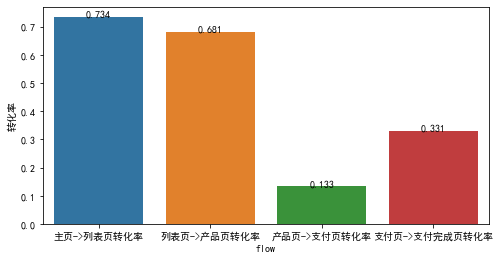

In [116]:
#用户操作系统
plt.figure(figsize=(8, 4))

g =sns.barplot(x='flow',y='convertion',data=funnel)

for index, row in funnel.iterrows():
    g.text(row.name,row.convertion,round(row.convertion,3),color='black', ha="center")

plt.ylabel('转化率')
plt.show()

课后作业：
市面上竞争对手的产品页面->支付页转化率在15%-18%，对比我们的网站,从产品页面->支付页转化率有待提升，大家有哪方面的思考？

* 纬度拆解分析 和 对比分析

普通的漏斗分析很简单，但一定要通过不同维度的分析，计算对应的转化率，才能挖到真正的业务痛点。

通过对比分析找到核心的维度痛点，并采取相应的措施。

**<font color=black size=4 face=雅黑>漏斗分析：性别维度</font>**

In [117]:
sex_funnel=user_info.groupby(['sex'])['home_page','listing_page','product_page','payment_page','confirmation_page'].sum()
sex_funnel

,home_page,listing_page,product_page,payment_page,confirmation_page
sex,,,,,
Female,55606,41036,28138,4141,1598
Male,34792,25355,17062,1889,396


In [118]:
sex_convertion=[]
page=['home_page','listing_page','product_page','payment_page','confirmation_page']
for i in range(len(sex_funnel.index)):
    for col in range(len(page)-1):
        sex_convertion.append(sex_funnel[page[col+1]][i].sum()/sex_funnel[page[col]][i].sum())

In [119]:
sex_convertion

[0.7379779160522246,
 0.6856906131201872,
 0.1471675314521288,
 0.38589712629799566,
 0.7287594849390665,
 0.672924472490633,
 0.11071386707302779,
 0.20963472736897829]

In [120]:
s=['Female']*4+['Male']*4

In [121]:
[*zip(s,list*2,sex_convertion)]

[('Female', '主页->列表页转化率', 0.7379779160522246),
 ('Female', '列表页->产品页转化率', 0.6856906131201872),
 ('Female', '产品页->支付页转化率', 0.1471675314521288),
 ('Female', '支付页->支付完成页转化率', 0.38589712629799566),
 ('Male', '主页->列表页转化率', 0.7287594849390665),
 ('Male', '列表页->产品页转化率', 0.672924472490633),
 ('Male', '产品页->支付页转化率', 0.11071386707302779),
 ('Male', '支付页->支付完成页转化率', 0.20963472736897829)]

In [122]:
sex_funnel=pd.DataFrame([*zip(s,list*2,sex_convertion)]).rename(columns={0:'sex',1:'flow',2:'sex_convertion'})
sex_funnel

,sex,flow,sex_convertion
0,Female,主页->列表页转化率,0.737978
1,Female,列表页->产品页转化率,0.685691
2,Female,产品页->支付页转化率,0.147168
3,Female,支付页->支付完成页转化率,0.385897
4,Male,主页->列表页转化率,0.728759
5,Male,列表页->产品页转化率,0.672924
6,Male,产品页->支付页转化率,0.110714
7,Male,支付页->支付完成页转化率,0.209635


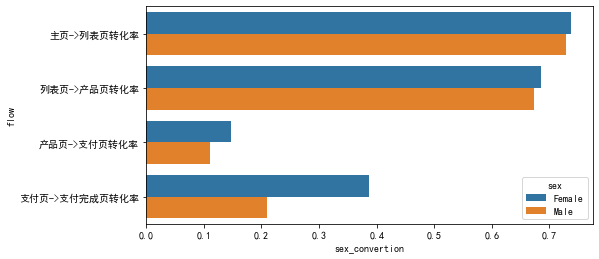

In [123]:
plt.figure(figsize=(8, 4))
sns.barplot(x='sex_convertion',y='flow',hue='sex',data=sex_funnel)
plt.show()

**<font color=black size=4 face=雅黑>漏斗分析：设备维度</font>**

In [124]:
device_funnel=user_info.groupby(['device'])['home_page','listing_page','product_page','payment_page','confirmation_page'].sum()
device_funnel

,home_page,listing_page,product_page,payment_page,confirmation_page
device,,,,,
desktop,37240,27312,18666,2554,910
mobile,53158,39079,26534,3476,1084


In [125]:
device_convertion=[]
page=['home_page','listing_page','product_page','payment_page','confirmation_page']
for i in range(len(device_funnel.index)):
    for col in range(len(page)-1):
        device_convertion.append(device_funnel[page[col+1]][i].sum()/device_funnel[page[col]][i].sum())

In [126]:
device_convertion

[0.7334049409237379,
 0.6834358523725835,
 0.13682631522554378,
 0.35630383711824587,
 0.7351480492117838,
 0.6789835973284885,
 0.1310017336247833,
 0.31185270425776757]

In [127]:
d=['desktop']*4+['mobile']*4

In [128]:
[*zip(d,list*2,device_convertion)]

[('desktop', '主页->列表页转化率', 0.7334049409237379),
 ('desktop', '列表页->产品页转化率', 0.6834358523725835),
 ('desktop', '产品页->支付页转化率', 0.13682631522554378),
 ('desktop', '支付页->支付完成页转化率', 0.35630383711824587),
 ('mobile', '主页->列表页转化率', 0.7351480492117838),
 ('mobile', '列表页->产品页转化率', 0.6789835973284885),
 ('mobile', '产品页->支付页转化率', 0.1310017336247833),
 ('mobile', '支付页->支付完成页转化率', 0.31185270425776757)]

In [129]:
dev_funnel=pd.DataFrame([*zip(d,list*2,device_convertion)]).rename(columns={0:'device',1:'flow',2:'dev_convertion'})
dev_funnel

,device,flow,dev_convertion
0,desktop,主页->列表页转化率,0.733405
1,desktop,列表页->产品页转化率,0.683436
2,desktop,产品页->支付页转化率,0.136826
3,desktop,支付页->支付完成页转化率,0.356304
4,mobile,主页->列表页转化率,0.735148
5,mobile,列表页->产品页转化率,0.678984
6,mobile,产品页->支付页转化率,0.131002
7,mobile,支付页->支付完成页转化率,0.311853


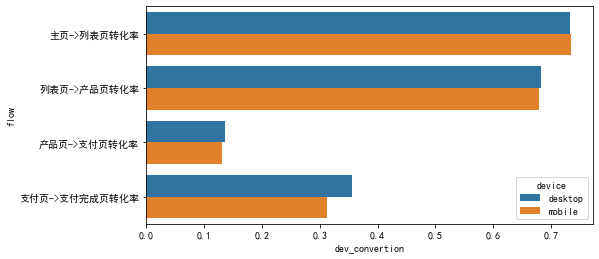

In [130]:
plt.figure(figsize=(8, 4))
sns.barplot(x='dev_convertion',y='flow',hue='device',data=dev_funnel)
plt.show()

1. 确认问题：前几步转化率都差不多，明显是desktop从支付页->支付完成页的转化率比mobile的高，高4%。
2. 找到问题发生的原因（提出猜想）：为什么desktop支付页做的比mobile好？以及mobile有哪些地方需要优化？
3. 解决问题（提出建议）

**<font color=black size=4 face=雅黑>漏斗分析：国家维度</font>**

In [131]:
country_funnel=user_info.groupby(['country'])['home_page','listing_page','product_page','payment_page','confirmation_page'].sum()
country_funnel

,home_page,listing_page,product_page,payment_page,confirmation_page
country,,,,,
China,16563,10665,7055,889,244
Germany,5027,4008,2900,425,151
UK,15401,11707,8008,1070,380
US,53407,40011,27237,3646,1219


In [132]:
country_convertion=[]
page=['home_page','listing_page','product_page','payment_page','confirmation_page']
for i in range(len(country_funnel.index)):
    for col in range(len(page)-1):
        country_convertion.append(country_funnel[page[col+1]][i].sum()/country_funnel[page[col]][i].sum())

In [133]:
country_convertion

[0.6439050896576707,
 0.6615096108766995,
 0.1260099220411056,
 0.2744656917885264,
 0.7972946091108016,
 0.7235528942115769,
 0.14655172413793102,
 0.3552941176470588,
 0.7601454451009675,
 0.6840351926198002,
 0.13361638361638362,
 0.35514018691588783,
 0.7491714569251222,
 0.680737797105796,
 0.13386202592062268,
 0.33433900164563907]

In [134]:
c=['China']*4+['Germany']*4+['UK']*4+['US']*4

In [135]:
country_funnel=pd.DataFrame([*zip(c,list*4,country_convertion)]).rename(columns={0:'country',1:'flow',2:'country_convertion'})
country_funnel

,country,flow,country_convertion
0,China,主页->列表页转化率,0.643905
1,China,列表页->产品页转化率,0.661510
2,China,产品页->支付页转化率,0.126010
3,China,支付页->支付完成页转化率,0.274466
4,Germany,主页->列表页转化率,0.797295
5,Germany,列表页->产品页转化率,0.723553
6,Germany,产品页->支付页转化率,0.146552
7,Germany,支付页->支付完成页转化率,0.355294
8,UK,主页->列表页转化率,0.760145
9,UK,列表页->产品页转化率,0.684035


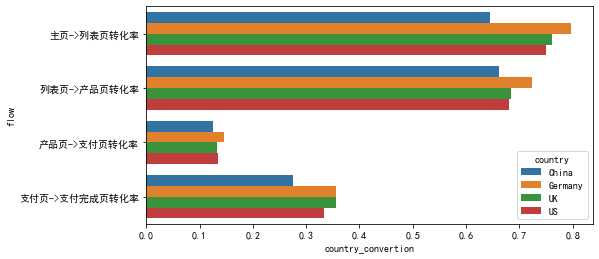

In [136]:
plt.figure(figsize=(8, 4))
sns.barplot(x='country_convertion',y='flow',hue='country',data=country_funnel)
plt.show()